In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
pd.options.display.float_format = '{:,.2f}'.format
print("Libraries imported and settings configured.")

Libraries imported and settings configured.


In [4]:
try:
    df = pd.read_csv('competitive_analysis_final_v5.csv')
    print("Final analysis dataset loaded successfully.")
    print(f"Dataset contains {len(df)} counties/regions.")
except FileNotFoundError:
    print("ERROR: Could not find 'competitive_analysis_final_v5.csv'.")
    print("Please ensure the final analysis script has been run successfully.")

Final analysis dataset loaded successfully.
Dataset contains 3142 counties/regions.


In [5]:
display(df.head())
df.info()

,county_full_name,population,median_income,starbucks_count,dunkin_count,total_coffee_shops,population_per_shop,population_opportunity,income_opportunity,opportunity_score,opportunity_level,market_landscape,county,state
0,"Alexandria city, Virginia",156788,113638,0,0,0,"156,788.00",1.00,0.98,0.99,Very High,Untapped,Alexandria city,Virginia
1,"Manassas city, Virginia",42674,117919,0,0,0,"42,674.00",0.97,0.98,0.98,Very High,Untapped,Manassas city,Virginia
2,"Anchorage Municipality, Alaska",289069,98152,0,0,0,"289,069.00",1.00,0.95,0.97,Very High,Untapped,Anchorage Municipality,Alaska
3,"Comal, Texas",174552,99015,1,1,2,"58,184.00",0.99,0.95,0.97,Very High,Competitive,Comal,Texas
4,"Chesapeake city, Virginia",251153,94189,0,0,0,"251,153.00",1.00,0.94,0.97,Very High,Untapped,Chesapeake city,Virginia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   county_full_name        3142 non-null   object 
 1   population              3142 non-null   int64  
 2   median_income           3142 non-null   int64  
 3   starbucks_count         3142 non-null   int64  
 4   dunkin_count            3142 non-null   int64  
 5   total_coffee_shops      3142 non-null   int64  
 6   population_per_shop     3142 non-null   float64
 7   population_opportunity  3142 non-null   float64
 8   income_opportunity      3142 non-null   float64
 9   opportunity_score       3142 non-null   float64
 10  opportunity_level       3142 non-null   object 
 11  market_landscape        3142 non-null   object 
 12  county                  3142 non-null   object 
 13  state                   3142 non-null   object 
dtypes: float64(4), int64(5), object(5)
memor

In [6]:
state_level_analysis = df.groupby('state').agg(
population=('population', 'sum'),
starbucks_count=('starbucks_count', 'sum'),
dunkin_count=('dunkin_count', 'sum'),
# Calculate a population-weighted average for the median income of the state
median_income=('median_income', lambda x: np.average(x, weights=df.loc[x.index, 'population']))
).reset_index()

In [7]:
state_level_analysis['total_coffee_shops'] = state_level_analysis['starbucks_count'] + state_level_analysis['dunkin_count']

In [8]:
state_level_analysis['people_per_shop_total'] = (state_level_analysis['population'] / (state_level_analysis['total_coffee_shops'] + 1)).astype(int)

In [9]:
income_weight_factor = 0.001
state_level_analysis['state_opportunity_score'] = np.log1p(state_level_analysis['people_per_shop_total']) * (state_level_analysis['median_income'] * income_weight_factor)

In [10]:
top_states = state_level_analysis.sort_values(by='state_opportunity_score', ascending=False)

In [11]:
print("--- TOP 15 STATES FOR COFFEE SHOP EXPANSION ---")
print("Ranked by a score considering population per store and average wealth.")
display(top_states.head(15))

--- TOP 15 STATES FOR COFFEE SHOP EXPANSION ---
Ranked by a score considering population per store and average wealth.


,state,population,starbucks_count,dunkin_count,median_income,total_coffee_shops,people_per_shop_total,state_opportunity_score
20,Maryland,6170738,306,300,"104,998.29",606,10165,968.80
46,Virginia,8657499,394,167,"99,591.90",561,15404,960.31
8,District of Columbia,672079,69,17,"106,287.00",86,7725,951.52
4,California,39242785,3174,127,"99,234.36",3301,11884,931.12
44,Utah,3331187,151,1,"92,836.75",152,21772,927.29
11,Hawaii,1445635,116,6,"98,863.64",122,11753,926.54
1,Alaska,733971,23,2,"89,683.26",25,28229,919.09
30,New Jersey,9267014,354,859,"102,215.27",1213,7633,913.84
47,Washington,7740984,704,0,"97,732.55",704,10980,909.30
23,Minnesota,5713716,243,32,"89,564.43",275,20701,890.09


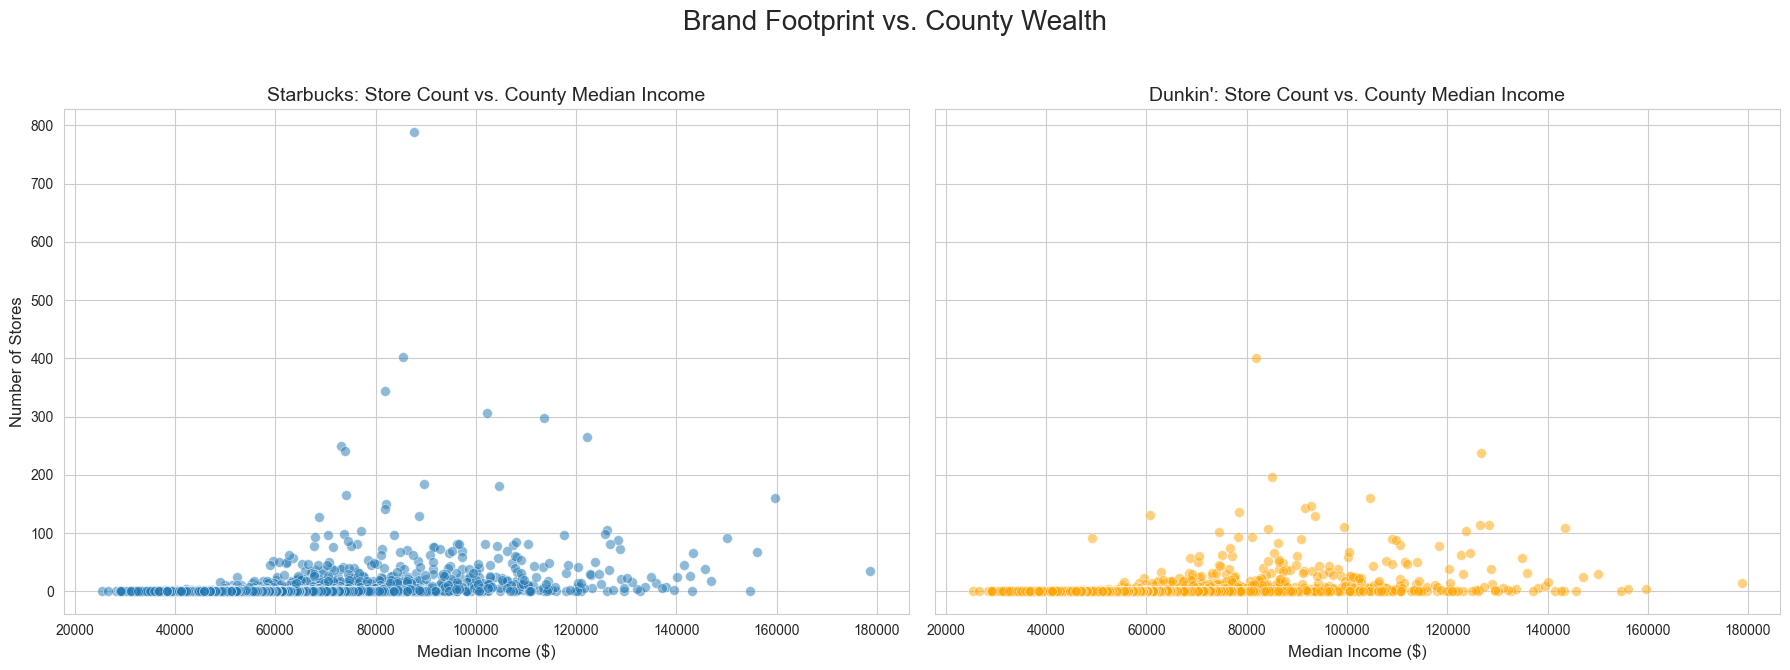

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
sns.scatterplot(data=df, x='median_income', y='starbucks_count', ax=ax1, alpha=0.5, s=50)
ax1.set_title('Starbucks: Store Count vs. County Median Income', fontsize=14)
ax1.set_xlabel('Median Income ($)', fontsize=12)
ax1.set_ylabel('Number of Stores', fontsize=12)

sns.scatterplot(data=df, x='median_income', y='dunkin_count', ax=ax2, alpha=0.5, s=50, color='orange')
ax2.set_title("Dunkin': Store Count vs. County Median Income", fontsize=14)
ax2.set_xlabel('Median Income ($)', fontsize=12)
ax2.set_ylabel('') # Hide redundant y-axis label

plt.suptitle('Brand Footprint vs. County Wealth', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
sbucks_present = df[df['starbucks_count'] > 0]
dunkin_present = df[df['dunkin_count'] > 0]

In [18]:
income_comparison_df = pd.DataFrame({
'Starbucks': sbucks_present['median_income'],
"Dunkin'": dunkin_present['median_income']
})

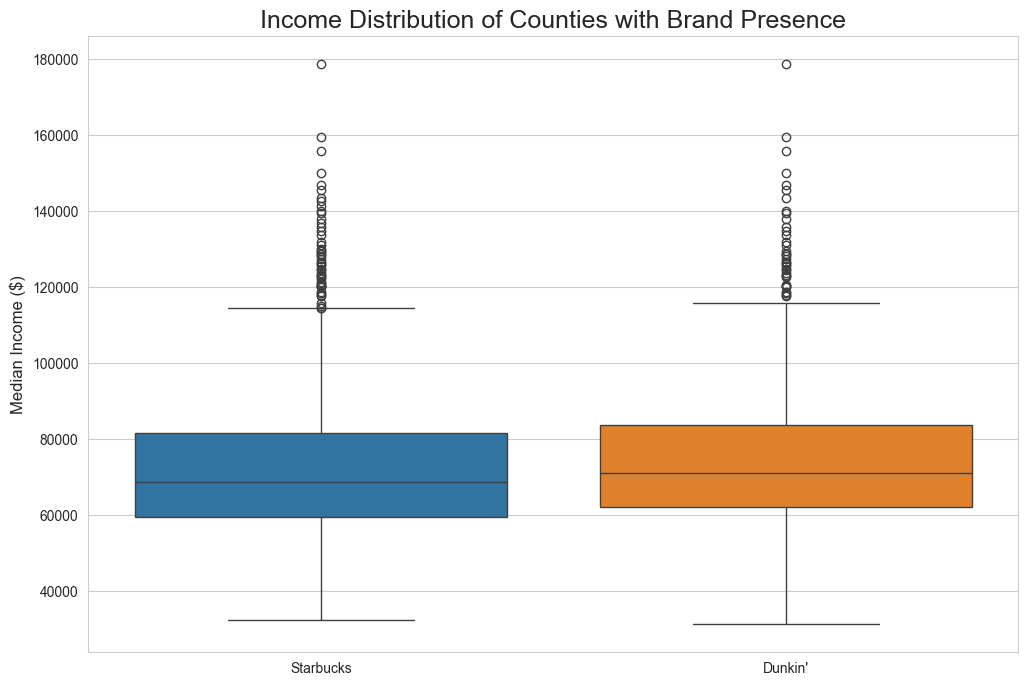

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=income_comparison_df)
plt.title('Income Distribution of Counties with Brand Presence', fontsize=18)
plt.ylabel('Median Income ($)', fontsize=12)
plt.show()

In [20]:
print(f"Average Median Income for a Starbucks County: ${sbucks_present['median_income'].mean():,.2f}")
print(f"Average Median Income for a Dunkin' County:    ${dunkin_present['median_income'].mean():,.2f}")

Average Median Income for a Starbucks County: $72,761.15
Average Median Income for a Dunkin' County:    $75,197.77


In [21]:
print("--- TOP 20 COUNTIES WITH HIGHEST OPPORTUNITY SCORE ---")
display_cols = [
'county',
'state',
'population',
'median_income',
'total_coffee_shops',
'opportunity_score',
'opportunity_level',
'market_landscape'
]

display(df[display_cols].head(20))



--- TOP 20 COUNTIES WITH HIGHEST OPPORTUNITY SCORE ---


,county,state,population,median_income,total_coffee_shops,opportunity_score,opportunity_level,market_landscape
0,Alexandria city,Virginia,156788,113638,0,0.99,Very High,Untapped
1,Manassas city,Virginia,42674,117919,0,0.98,Very High,Untapped
2,Anchorage Municipality,Alaska,289069,98152,0,0.97,Very High,Untapped
3,Comal,Texas,174552,99015,2,0.97,Very High,Competitive
4,Chesapeake city,Virginia,251153,94189,0,0.97,Very High,Untapped
5,Virginia Beach city,Virginia,457066,90685,0,0.96,Very High,Untapped
6,Suffolk city,Virginia,96638,90089,0,0.96,Very High,Untapped
7,Monroe,Illinois,34969,101635,0,0.95,Very High,Untapped
8,Juneau City and,Alaska,31969,100513,0,0.94,Very High,Untapped
9,Lincoln,Missouri,61636,85276,0,0.94,Very High,Untapped


--- Starting Final Deep-Dive Analysis ---


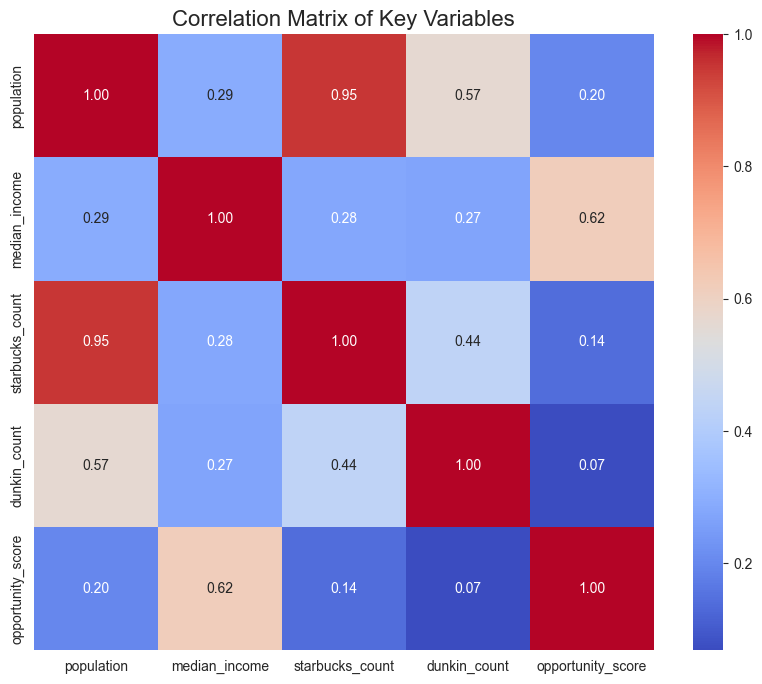


--- DEEP-DIVE: TOP 5 MOST SATURATED STARBUCKS COUNTIES ---


,county,state,population,median_income,starbucks_count,opportunity_level
565,Los Angeles,California,9848406,87760,788,Very High
907,Maricopa,Arizona,4491987,85518,402,High
1454,Cook,Illinois,5185812,81797,344,High
687,San Diego,California,3282782,102285,307,Very High
616,Orange,California,3164063,113702,298,Very High



--- DEEP-DIVE: TOP 5 MOST SATURATED DUNKIN' COUNTIES ---


,county,state,population,median_income,dunkin_count,opportunity_level
1454,Cook,Illinois,5185812,81797,401,High
1294,Middlesex,Massachusetts,1622896,126779,237,High
1030,Queens,New York,2330124,84961,196,High
1411,New York,New York,1627788,104553,161,High
1618,Suffolk,Massachusetts,782172,92859,147,Medium


In [ ]:
# --- Section 5: Deep-Dive into Outliers and Correlations ---

print("--- Starting Final Deep-Dive Analysis ---")

# --- 5a. Correlation Analysis ---
# Let's quantify the relationships between our key numeric variables.
correlation_matrix = df[['population', 'median_income', 'starbucks_count', 'dunkin_count', 'opportunity_score']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.show()

# --- 5b. Outlier Analysis: Hyper-Saturated Markets ---

top_starbucks_counties = df.sort_values(by='starbucks_count', ascending=False).head(5)
top_dunkin_counties = df.sort_values(by='dunkin_count', ascending=False).head(5)

print("\n--- DEEP-DIVE: TOP 5 MOST SATURATED STARBUCKS COUNTIES ---")
display(top_starbucks_counties[['county', 'state', 'population', 'median_income', 'starbucks_count', 'opportunity_level']])

print("\n--- DEEP-DIVE: TOP 5 MOST SATURATED DUNKIN' COUNTIES ---")
display(top_dunkin_counties[['county', 'state', 'population', 'median_income', 'dunkin_count', 'opportunity_level']])

In [ ]:
# Section 6: Actionable Insights - The "Blue Ocean" Opportunity List

print("--- Generating the 'Blue Ocean' / Priority Untapped Market List ---")

# 6a. Filter for Priority Untapped Markets
blue_ocean_df = df[df['market_landscape'] == 'Untapped'].copy()

# Sort these untapped markets by our opportunity score to rank them from best to worst
blue_ocean_df = blue_ocean_df.sort_values(by='opportunity_score', ascending=False)

#  6b. Display the Final Actionable List
print(f"\nFound {len(blue_ocean_df)} counties that are 'Priority Untapped Markets'.")
print("These are counties with zero Starbucks or Dunkin's that meet significant population and income thresholds.")
print("\n--- TOP 20 'BLUE OCEAN' EXPANSION TARGETS ---")

# Select and reorder columns for a clean presentation
display_cols = [
    'county',
    'state',
    'population',
    'median_income',
    'opportunity_score',
    'opportunity_level'
]

display(blue_ocean_df[display_cols].head(20))

--- Generating the 'Blue Ocean' / Priority Untapped Market List ---

Found 1580 counties that are 'Priority Untapped Markets'.
These are counties with zero Starbucks or Dunkin's that meet significant population and income thresholds.

--- TOP 20 'BLUE OCEAN' EXPANSION TARGETS ---


,county,state,population,median_income,opportunity_score,opportunity_level
0,Alexandria city,Virginia,156788,113638,0.99,Very High
1,Manassas city,Virginia,42674,117919,0.98,Very High
2,Anchorage Municipality,Alaska,289069,98152,0.97,Very High
4,Chesapeake city,Virginia,251153,94189,0.97,Very High
5,Virginia Beach city,Virginia,457066,90685,0.96,Very High
6,Suffolk city,Virginia,96638,90089,0.96,Very High
7,Monroe,Illinois,34969,101635,0.95,Very High
8,Juneau City and,Alaska,31969,100513,0.94,Very High
9,Lincoln,Missouri,61636,85276,0.94,Very High
12,Fayette,Tennessee,42653,84764,0.93,Very High
